# COMP30027 ML Project 2

#### 0. Preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_dataset = pd.read_csv(r'project_data/train_dataset.csv')
test_dataset = pd.read_csv(r'project_data/test_dataset.csv')

##### 0.1 Inspection

In [2]:
train_dataset.loc[
    train_dataset['imdb_score_binned'] == 4,
    ['director_name', 'movie_title', 'actor_1_name', 'actor_2_name', 'title_year']
].sample(10)

,director_name,movie_title,actor_1_name,actor_2_name,title_year
1294,Sam Mendes,American Beauty,Kevin Spacey,Peter Gallagher,1999
837,Tony Kaye,American History X,Ethan Suplee,Beverly D'Angelo,1998
2478,Akira Kurosawa,Seven Samurai,Takashi Shimura,Minoru Chiaki,1954
1802,John G. Avildsen,Rocky,Sylvester Stallone,Burgess Meredith,1976
896,Oliver Hirschbiegel,Downfall,Thomas Kretschmann,Bruno Ganz,2004
3000,Ron Howard,Rush,Chris Hemsworth,Olivia Wilde,2013
886,James Cameron,The Terminator,Michael Biehn,Brian Thompson,1984
1318,Victor Fleming,Gone with the Wind,Hattie McDaniel,George Reeves,1939
1157,Tom McCarthy,Spotlight,Billy Crudup,Jamey Sheridan,2015
1144,Ridley Scott,Alien,Tom Skerritt,Yaphet Kotto,1979


In [3]:
train_dataset.loc[
    train_dataset['director_name'] == 'Christopher Nolan',
    ['movie_title', 'imdb_score_binned', 'gross', 'title_year', 'director_facebook_likes']
]

,movie_title,imdb_score_binned,gross,title_year,director_facebook_likes
665,Memento,4,25530884,2000,22000
701,Insomnia,3,67263182,2002,22000
1214,Batman Begins,4,205343774,2005,22000
1809,Inception,4,292568851,2010,22000
1941,The Dark Knight Rises,4,448130642,2012,22000
2881,The Dark Knight,4,533316061,2008,22000


##### 0.2 Feature values

In [4]:
# label distribution
train_dataset['imdb_score_binned'].value_counts(normalize=True).sort_index()

imdb_score_binned
0    0.007989
1    0.078229
2    0.612184
3    0.258655
4    0.042943
Name: proportion, dtype: float64

In [5]:
train_dataset['language'].value_counts(normalize=True).sort_values(ascending=False)

language
English       0.956377
French        0.010656
Spanish       0.006327
Mandarin      0.002997
Japanese      0.002997
German        0.002997
Italian       0.001665
Cantonese     0.001665
Korean        0.001332
Portuguese    0.001332
Hindi         0.000999
Norwegian     0.000999
Dutch         0.000999
Danish        0.000999
Persian       0.000666
Dari          0.000666
Indonesian    0.000666
Thai          0.000666
Aboriginal    0.000666
Kazakh        0.000333
Maya          0.000333
Aramaic       0.000333
Filipino      0.000333
Bosnian       0.000333
Czech         0.000333
Zulu          0.000333
Vietnamese    0.000333
Hungarian     0.000333
Hebrew        0.000333
Mongolian     0.000333
Romanian      0.000333
Arabic        0.000333
Name: proportion, dtype: float64

In [6]:
train_dataset['content_rating'].unique()

array(['G', 'R', 'PG-13', 'Approved', 'PG', 'Not Rated', 'NC-17',
       'Unrated', 'X', 'M', 'GP', 'Passed'], dtype=object)

In [7]:
train_dataset[['gross', 'num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'duration']].describe().round(2)

,gross,num_critic_for_reviews,num_voted_users,num_user_for_reviews,duration
count,3.004000e+03,3004.00,3004.00,3004.00,3004.00
mean,5.187733e+07,165.61,104901.74,335.92,110.08
std,6.840156e+07,121.25,150857.28,415.22,21.91
min,1.620000e+02,2.00,91.00,4.00,37.00
25%,8.579684e+06,76.00,18978.25,108.00,96.00
50%,3.020586e+07,137.00,53874.00,208.00,106.00
75%,6.647359e+07,223.00,128489.50,398.00,120.00
max,6.586723e+08,813.00,1689764.00,5060.00,330.00


<Axes: >

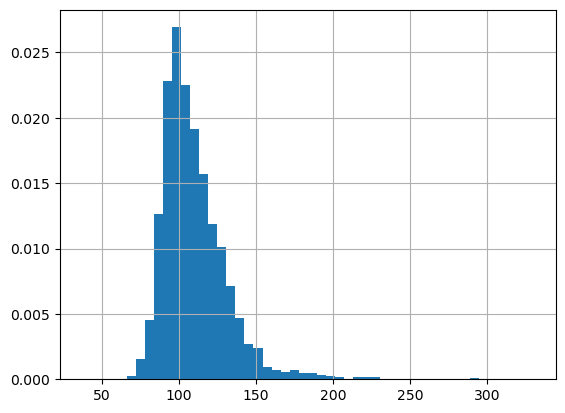

In [8]:
train_dataset['duration'].hist(bins=50, density=True)

<Axes: >

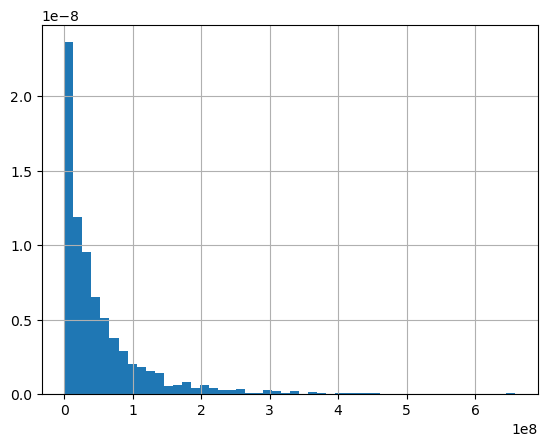

In [9]:
train_dataset['gross'].hist(bins=50, density=True)

##### 0.3 Relations between features and label

In [10]:
train_dataset.groupby(['imdb_score_binned'])['director_facebook_likes'].describe()

,count,mean,std,min,25%,50%,75%,max
imdb_score_binned,,,,,,,,
0,24.0,143.416667,242.636589,0.0,15.0,70.0,115.75,892.0
1,235.0,167.004255,1015.100157,0.0,8.0,27.0,79.50,11000.0
2,1839.0,493.214247,2187.669464,0.0,13.0,58.0,189.00,23000.0
3,777.0,1272.722008,3844.692674,0.0,4.0,101.0,387.00,22000.0
4,129.0,3109.860465,6381.592554,0.0,0.0,161.0,835.00,22000.0


<Axes: title={'center': 'average_degree_centrality'}, xlabel='imdb_score_binned'>

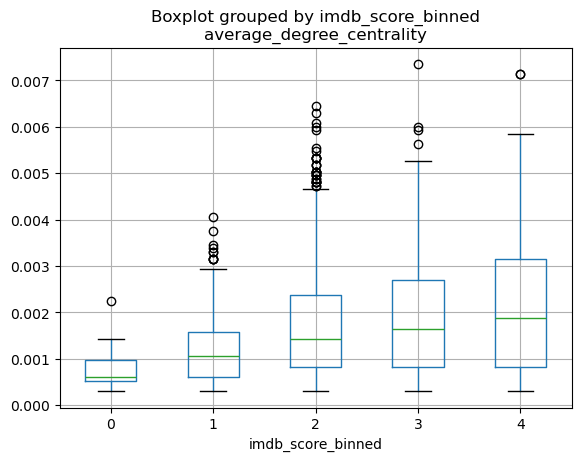

In [11]:
# boxplot
train_dataset.boxplot(
    'average_degree_centrality', by='imdb_score_binned'
)

imdb_score_binned
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
Name: average_degree_centrality, dtype: object

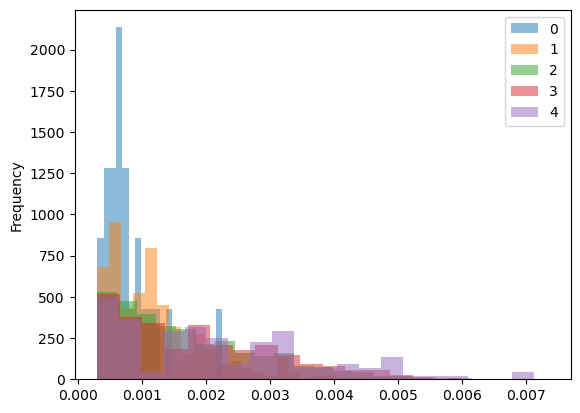

In [12]:
train_dataset.groupby(['imdb_score_binned'])['average_degree_centrality'].plot.hist(
    bins=20, alpha=0.5, legend=True, density=True
)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
       <Axes: title={'center': '4'}>], dtype=object)

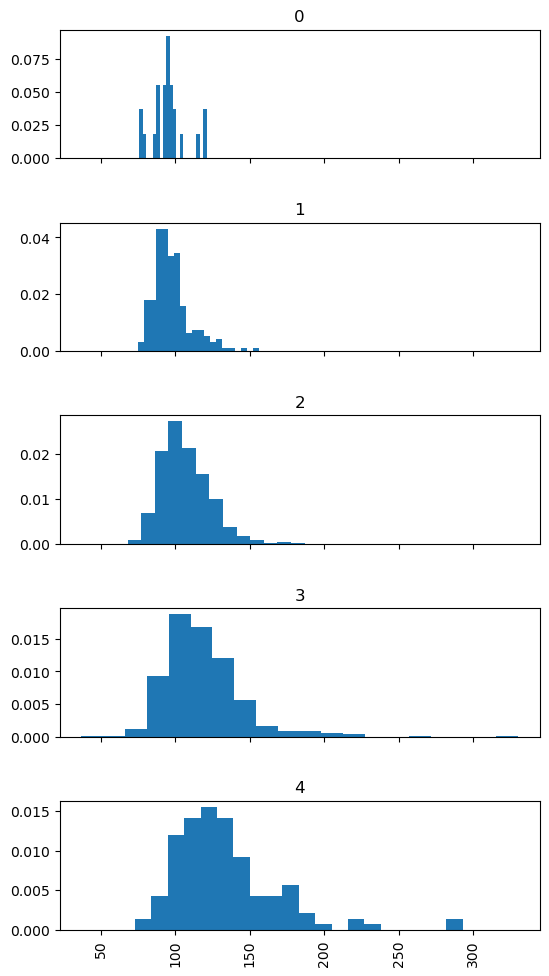

In [13]:
train_dataset.hist(
    'duration', by='imdb_score_binned', bins=20, layout=(5,1),
    density=True, sharex=True, figsize=(6,12)
)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
       <Axes: title={'center': '4'}>], dtype=object)

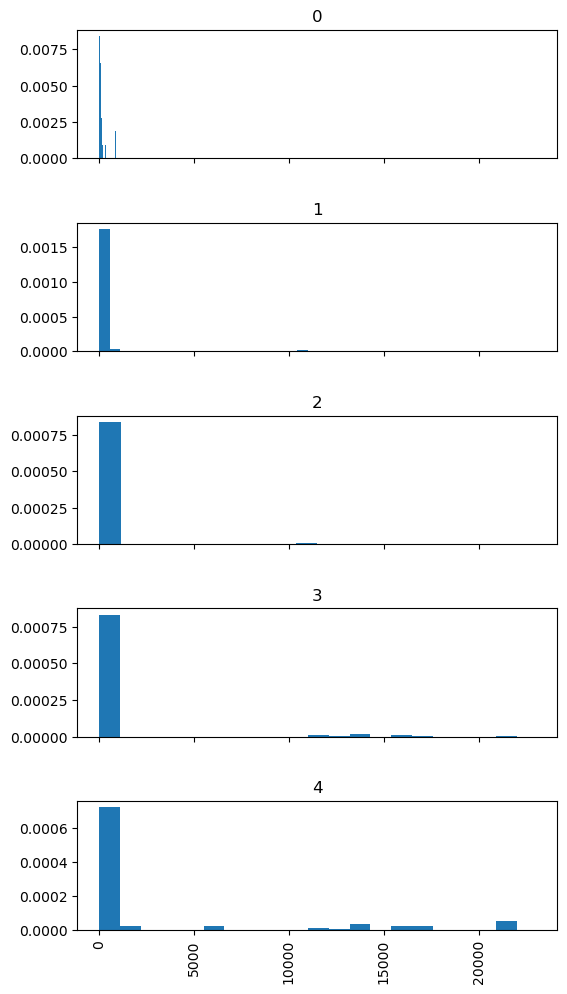

In [14]:
train_dataset.hist(
    'director_facebook_likes', by='imdb_score_binned', bins=20, layout=(5,1),
    density=True, sharex=True, figsize=(6,12)
)

In [15]:
# train_dataset.pivot_table()
pd.crosstab(
    index=train_dataset['content_rating'], columns=train_dataset['language']=='English', values=train_dataset['imdb_score_binned'],
    aggfunc=['mean', 'count'], margins=True
).round(2)

mean              count              
language       False  True   All  False    True   All
content_rating                                       
Approved         NaN  2.64  2.64    NaN    14.0    14
G               2.67  2.32  2.34    3.0    65.0    68
GP               NaN  2.00  2.00    NaN     1.0     1
M                NaN  3.00  3.00    NaN     2.0     2
NC-17            NaN  2.00  2.00    NaN     3.0     3
Not Rated       2.88  2.42  2.56    8.0    19.0    27
PG              3.22  2.16  2.18    9.0   449.0   458
PG-13           2.88  2.11  2.12   24.0  1015.0  1039
Passed           NaN  2.00  2.00    NaN     2.0     2
R               2.90  2.32  2.35   82.0  1280.0  1362
Unrated         2.40  2.43  2.42    5.0    14.0    19
X               2.00  2.50  2.44    1.0     8.0     9
All             2.89  2.22  2.25  132.0  2872.0  3004

In [16]:
pd.crosstab(
    index=train_dataset['content_rating'], columns=train_dataset['imdb_score_binned'], values=train_dataset['imdb_score_binned'],
    aggfunc=['mean', 'count'], margins=True
).round(2)

mean                           count                        \
imdb_score_binned    0    1    2    3    4   All     0      1       2      3   
content_rating                                                                 
Approved           NaN  NaN  2.0  3.0  NaN  2.64   NaN    NaN     5.0    9.0   
G                  0.0  1.0  2.0  3.0  4.0  2.34   3.0    5.0    33.0   20.0   
GP                 NaN  NaN  2.0  NaN  NaN  2.00   NaN    NaN     1.0    NaN   
M                  NaN  NaN  2.0  NaN  4.0  3.00   NaN    NaN     1.0    NaN   
NC-17              NaN  1.0  2.0  3.0  NaN  2.00   NaN    1.0     1.0    1.0   
Not Rated          NaN  1.0  2.0  3.0  4.0  2.56   NaN    2.0    12.0    9.0   
PG                 0.0  1.0  2.0  3.0  4.0  2.18   5.0   54.0   273.0  106.0   
PG-13              0.0  1.0  2.0  3.0  4.0  2.12  10.0  105.0   695.0  205.0   
Passed             NaN  NaN  2.0  NaN  NaN  2.00   NaN    NaN     2.0    NaN   
R                  0.0  1.0  2.0  3.0  4.0  2.35   6.0   68.0   799.0  417.0   
Unrated            NaN  NaN  2.0  3.0  4.0  2.42   NaN    NaN    12.0    6.0   
X                  NaN  NaN  2.0  3.0  NaN  2.44   NaN    NaN     5.0    4.0   
All                0.0  1.0  2.0  3.0  4.0  2.25  24.0  235.0  1839.0  777.0   

                                
imdb_score_binned      4   All  
content_rating                  
Approved             NaN    14  
G                    7.0    68  
GP                   NaN     1  
M                    1.0     2  
NC-17                NaN     3  
Not Rated            4.0    27  
PG                  20.0   458  
PG-13               24.0  1039  
Passed               NaN     2  
R                   72.0  1362  
Unrated              1.0    19  
X                    NaN     9  
All                129.0  3004

In [17]:
pd.crosstab(
    index=train_dataset['content_rating'], columns=train_dataset['imdb_score_binned'], values=train_dataset['imdb_score_binned'],
    aggfunc=['count'], margins=True
).round(2)

count                                   
imdb_score_binned     0      1       2      3      4   All
content_rating                                            
Approved            NaN    NaN     5.0    9.0    NaN    14
G                   3.0    5.0    33.0   20.0    7.0    68
GP                  NaN    NaN     1.0    NaN    NaN     1
M                   NaN    NaN     1.0    NaN    1.0     2
NC-17               NaN    1.0     1.0    1.0    NaN     3
Not Rated           NaN    2.0    12.0    9.0    4.0    27
PG                  5.0   54.0   273.0  106.0   20.0   458
PG-13              10.0  105.0   695.0  205.0   24.0  1039
Passed              NaN    NaN     2.0    NaN    NaN     2
R                   6.0   68.0   799.0  417.0   72.0  1362
Unrated             NaN    NaN    12.0    6.0    1.0    19
X                   NaN    NaN     5.0    4.0    NaN     9
All                24.0  235.0  1839.0  777.0  129.0  3004

In [18]:
pd.crosstab(
    index=train_dataset['content_rating'], columns=train_dataset['imdb_score_binned'], values=train_dataset['imdb_score_binned'],
    aggfunc=['mean'], margins=True
).round(2)

mean                          
imdb_score_binned    0    1    2    3    4   All
content_rating                                  
Approved           NaN  NaN  2.0  3.0  NaN  2.64
G                  0.0  1.0  2.0  3.0  4.0  2.34
GP                 NaN  NaN  2.0  NaN  NaN  2.00
M                  NaN  NaN  2.0  NaN  4.0  3.00
NC-17              NaN  1.0  2.0  3.0  NaN  2.00
Not Rated          NaN  1.0  2.0  3.0  4.0  2.56
PG                 0.0  1.0  2.0  3.0  4.0  2.18
PG-13              0.0  1.0  2.0  3.0  4.0  2.12
Passed             NaN  NaN  2.0  NaN  NaN  2.00
R                  0.0  1.0  2.0  3.0  4.0  2.35
Unrated            NaN  NaN  2.0  3.0  4.0  2.42
X                  NaN  NaN  2.0  3.0  NaN  2.44
All                0.0  1.0  2.0  3.0  4.0  2.25

In [19]:
pd.crosstab(
    index=train_dataset['content_rating'], columns=train_dataset['imdb_score_binned'], values=train_dataset['imdb_score_binned'],
    aggfunc=['count']
).round(2)

count                           
imdb_score_binned     0      1      2      3     4
content_rating                                    
Approved            NaN    NaN    5.0    9.0   NaN
G                   3.0    5.0   33.0   20.0   7.0
GP                  NaN    NaN    1.0    NaN   NaN
M                   NaN    NaN    1.0    NaN   1.0
NC-17               NaN    1.0    1.0    1.0   NaN
Not Rated           NaN    2.0   12.0    9.0   4.0
PG                  5.0   54.0  273.0  106.0  20.0
PG-13              10.0  105.0  695.0  205.0  24.0
Passed              NaN    NaN    2.0    NaN   NaN
R                   6.0   68.0  799.0  417.0  72.0
Unrated             NaN    NaN   12.0    6.0   1.0
X                   NaN    NaN    5.0    4.0   NaN

In [20]:
train_dataset['language']

0       English
1       English
2       English
3       English
4       English
         ...   
2999    English
3000    English
3001    English
3002     Arabic
3003    Spanish
Name: language, Length: 3004, dtype: object

In [21]:
train_dataset['language']=='English'

0        True
1        True
2        True
3        True
4        True
        ...  
2999     True
3000     True
3001     True
3002    False
3003    False
Name: language, Length: 3004, dtype: bool

In [22]:
pd.crosstab(
    index=train_dataset['language']=='English', columns=train_dataset['imdb_score_binned'], values=train_dataset['imdb_score_binned'],
    aggfunc=['count'], margins=True
).round(2).fillna(0).astype(int)

count                           
imdb_score_binned     0    1     2    3    4   All
language                                          
False                 0    1    35   74   22   132
True                 24  234  1804  703  107  2872
All                  24  235  1839  777  129  3004

In [23]:
tmp = pd.crosstab(
    index=train_dataset['language']=='English', columns=train_dataset['imdb_score_binned'], values=train_dataset['imdb_score_binned'],
    aggfunc=['count'], margins=True
).round(2).fillna(0).astype(int)
tmp.div(tmp[('count', 'All')], axis=0)

count                                             
imdb_score_binned         0         1         2         3         4  All
language                                                                
False              0.000000  0.007576  0.265152  0.560606  0.166667  1.0
True               0.008357  0.081476  0.628134  0.244777  0.037256  1.0
All                0.007989  0.078229  0.612184  0.258655  0.042943  1.0

In [24]:
train_dataset.groupby(train_dataset['language']=='English')['imdb_score_binned'].describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
False,132.0,2.886364,0.672783,1.0,2.0,3.0,3.0,4.0
True,2872.0,2.221100,0.678218,0.0,2.0,2.0,3.0,4.0


In [25]:
train_dataset.groupby(train_dataset['language']=='English')['imdb_score_binned'].mean()

language
False    2.886364
True     2.221100
Name: imdb_score_binned, dtype: float64

#### 1. Preprocessing

In [26]:
train_dataset.head(1).T

,0
id,1
director_name,Roger Allers
num_critic_for_reviews,186
duration,73
director_facebook_likes,28
actor_3_facebook_likes,847
actor_2_name,Nathan Lane
actor_1_facebook_likes,2000
gross,422783777
genres,Adventure|Animation|Drama|Family|Musical


##### 1.1 Title embedding

In [27]:
train_dataset['title_embedding'].iloc[0]

'[-4.1984697e-03  4.2941985e-03 -1.1961063e-03  3.6814427e-03\n  3.2565726e-03 -3.5001317e-03  1.0069078e-03  1.1182259e-03\n  4.2644851e-03 -1.0382137e-03 -3.6454869e-03 -6.9513317e-04\n -1.1519078e-03  2.2030093e-03 -1.7748430e-03 -3.1937044e-03\n -6.5757957e-04  1.7453490e-04 -2.2419260e-03 -3.0175799e-03\n -3.5909249e-03 -4.7650263e-03 -2.1646160e-03  5.1170369e-03\n -8.7369876e-03 -5.5002053e-03 -1.8632645e-03 -1.6813033e-03\n -1.9086580e-03 -1.5372996e-03  7.3320977e-04 -3.6102086e-03\n  4.6479381e-03 -7.4564219e-03 -2.2147747e-03  1.0003914e-02\n  3.0996688e-03  9.7796484e-04  2.5147211e-03 -2.3555579e-03\n  8.6343372e-03 -5.6004054e-03 -1.6822485e-03 -3.8470356e-03\n -1.5438221e-03 -3.9288620e-03 -2.6225317e-03  3.7558300e-03\n  1.4958460e-03  6.0779587e-03 -3.9718510e-03 -5.4420657e-03\n  9.4871456e-03 -5.3161406e-03 -1.4914786e-03 -2.3536941e-03\n  5.4897196e-03 -6.9670402e-03  2.6748128e-05  1.8063770e-03\n  2.1376107e-03 -6.1884883e-04 -3.6032442e-03  7.2673097e-04\n -1.054

In [28]:
print(train_dataset['title_embedding'].iloc[0])

[-4.1984697e-03  4.2941985e-03 -1.1961063e-03  3.6814427e-03
  3.2565726e-03 -3.5001317e-03  1.0069078e-03  1.1182259e-03
  4.2644851e-03 -1.0382137e-03 -3.6454869e-03 -6.9513317e-04
 -1.1519078e-03  2.2030093e-03 -1.7748430e-03 -3.1937044e-03
 -6.5757957e-04  1.7453490e-04 -2.2419260e-03 -3.0175799e-03
 -3.5909249e-03 -4.7650263e-03 -2.1646160e-03  5.1170369e-03
 -8.7369876e-03 -5.5002053e-03 -1.8632645e-03 -1.6813033e-03
 -1.9086580e-03 -1.5372996e-03  7.3320977e-04 -3.6102086e-03
  4.6479381e-03 -7.4564219e-03 -2.2147747e-03  1.0003914e-02
  3.0996688e-03  9.7796484e-04  2.5147211e-03 -2.3555579e-03
  8.6343372e-03 -5.6004054e-03 -1.6822485e-03 -3.8470356e-03
 -1.5438221e-03 -3.9288620e-03 -2.6225317e-03  3.7558300e-03
  1.4958460e-03  6.0779587e-03 -3.9718510e-03 -5.4420657e-03
  9.4871456e-03 -5.3161406e-03 -1.4914786e-03 -2.3536941e-03
  5.4897196e-03 -6.9670402e-03  2.6748128e-05  1.8063770e-03
  2.1376107e-03 -6.1884883e-04 -3.6032442e-03  7.2673097e-04
 -1.0546452e-04  4.90887

In [29]:
type(train_dataset['title_embedding'].iloc[0])

str

In [30]:
np.load(r'project_data/features_fasttext/train_fasttext_title_embeddings.npy')[0]

array([-4.1984697e-03,  4.2941985e-03, -1.1961063e-03,  3.6814427e-03,
        3.2565726e-03, -3.5001317e-03,  1.0069078e-03,  1.1182259e-03,
        4.2644851e-03, -1.0382137e-03, -3.6454869e-03, -6.9513317e-04,
       -1.1519078e-03,  2.2030093e-03, -1.7748430e-03, -3.1937044e-03,
       -6.5757957e-04,  1.7453490e-04, -2.2419260e-03, -3.0175799e-03,
       -3.5909249e-03, -4.7650263e-03, -2.1646160e-03,  5.1170369e-03,
       -8.7369876e-03, -5.5002053e-03, -1.8632645e-03, -1.6813033e-03,
       -1.9086580e-03, -1.5372996e-03,  7.3320977e-04, -3.6102086e-03,
        4.6479381e-03, -7.4564219e-03, -2.2147747e-03,  1.0003914e-02,
        3.0996688e-03,  9.7796484e-04,  2.5147211e-03, -2.3555579e-03,
        8.6343372e-03, -5.6004054e-03, -1.6822485e-03, -3.8470356e-03,
       -1.5438221e-03, -3.9288620e-03, -2.6225317e-03,  3.7558300e-03,
        1.4958460e-03,  6.0779587e-03, -3.9718510e-03, -5.4420657e-03,
        9.4871456e-03, -5.3161406e-03, -1.4914786e-03, -2.3536941e-03,
      

In [31]:
pd.DataFrame(np.load(r'project_data/features_fasttext/train_fasttext_title_embeddings.npy'))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.004198,0.004294,-0.001196,0.003681,0.003257,-0.003500,0.001007,0.001118,0.004264,-0.001038,...,0.004746,0.003770,0.001390,0.003076,-0.008132,0.001598,0.006643,0.002400,-0.003933,-0.005527
1,-0.004759,0.002651,-0.000380,0.001635,0.003939,-0.003758,-0.000156,0.004196,0.001613,-0.000283,...,0.005036,0.003941,0.003205,0.001162,-0.005804,0.002159,0.003575,-0.000710,-0.003438,-0.006788
2,0.002781,-0.003155,-0.000064,0.003097,0.002036,-0.006839,-0.003710,0.000559,-0.003780,0.003445,...,-0.000173,0.000985,-0.004908,0.000435,0.002376,0.000944,0.003305,0.000132,-0.002589,-0.002180
3,-0.005327,0.003607,0.000792,0.004539,0.003718,-0.004677,-0.000492,0.002531,0.004847,-0.001693,...,0.005158,0.005430,0.003289,0.002486,-0.010253,0.003423,0.006926,0.001835,-0.005065,-0.008602
4,-0.004259,0.003626,-0.001533,0.001513,0.004033,-0.003782,0.000013,0.003052,0.002775,-0.001284,...,0.004583,0.005102,0.002862,0.000808,-0.007791,0.002772,0.005651,-0.000516,-0.004016,-0.006797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,-0.002348,0.000408,-0.000467,0.000745,0.001783,-0.001585,0.001453,0.000740,0.002141,-0.000356,...,0.001290,0.002782,-0.000041,0.001678,-0.002992,-0.000076,0.002639,-0.000180,-0.001575,-0.002464
3000,0.001623,-0.000492,0.003654,-0.002049,0.001007,-0.001930,-0.004225,-0.000030,0.001104,0.000742,...,0.000591,-0.000388,0.001460,-0.000175,-0.000439,0.000435,-0.000345,0.003004,0.000988,-0.001010
3001,-0.001068,0.001700,-0.000299,0.001042,0.002339,-0.000622,0.000503,-0.000611,0.000021,0.000126,...,-0.000081,0.001027,-0.000284,0.000425,-0.000426,0.000349,0.002354,0.000964,-0.000928,-0.000762
3002,-0.001281,-0.001883,0.001825,0.000575,0.000522,-0.001380,-0.000509,0.000530,0.000382,-0.001104,...,-0.001824,0.001365,-0.000980,-0.000108,-0.002340,0.002191,0.000235,0.000919,-0.000518,-0.001860


In [32]:
genre_embedding = pd.DataFrame(np.load(r'project_data/features_doc2vec/train_doc2vec_features_genre.npy'))

In [33]:
# method 1: concatenate
title_embedding = pd.DataFrame(np.load(r'project_data/features_fasttext/train_fasttext_title_embeddings.npy'))
pd.concat([train_dataset, title_embedding], axis=1)

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,90,91,92,93,94,95,96,97,98,99
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,...,0.004746,0.003770,0.001390,0.003076,-0.008132,0.001598,0.006643,0.002400,-0.003933,-0.005527
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,...,0.005036,0.003941,0.003205,0.001162,-0.005804,0.002159,0.003575,-0.000710,-0.003438,-0.006788
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,...,-0.000173,0.000985,-0.004908,0.000435,0.002376,0.000944,0.003305,0.000132,-0.002589,-0.002180
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,...,0.005158,0.005430,0.003289,0.002486,-0.010253,0.003423,0.006926,0.001835,-0.005065,-0.008602
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,...,0.004583,0.005102,0.002862,0.000808,-0.007791,0.002772,0.005651,-0.000516,-0.004016,-0.006797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,3000,Ken Kwapis,161,129,42,49,Sabrina Revelle,97,93952276,Comedy|Drama|Romance,...,0.001290,0.002782,-0.000041,0.001678,-0.002992,-0.000076,0.002639,-0.000180,-0.001575,-0.002464
3000,3001,Ron Howard,393,123,2000,471,Olivia Wilde,26000,26903709,Action|Biography|Drama|Sport,...,0.000591,-0.000388,0.001460,-0.000175,-0.000439,0.000435,-0.000345,0.003004,0.000988,-0.001010
3001,3002,F. Gary Gray,216,118,473,963,Leslie Bibb,18000,73343413,Crime|Drama|Thriller,...,-0.000081,0.001027,-0.000284,0.000425,-0.000426,0.000349,0.002354,0.000964,-0.000928,-0.000762
3002,3003,Nadine Labaki,109,95,0,0,Adel Karam,227,1060591,Comedy|Drama|Romance,...,-0.001824,0.001365,-0.000980,-0.000108,-0.002340,0.002191,0.000235,0.000919,-0.000518,-0.001860


In [34]:
# method 2: use a model to fit abstract features, and use predictions as a new feature

##### 1.2 Genre

In [35]:
train_dataset['genres']

0       Adventure|Animation|Drama|Family|Musical
1                                         Horror
2                                          Drama
3                          Horror|Mystery|Sci-Fi
4                 Action|Adventure|Drama|Fantasy
                          ...                   
2999                        Comedy|Drama|Romance
3000                Action|Biography|Drama|Sport
3001                        Crime|Drama|Thriller
3002                        Comedy|Drama|Romance
3003                                Comedy|Drama
Name: genres, Length: 3004, dtype: object

In [36]:
train_dataset['genres'].nunique()

675

In [37]:
train_dataset['genres'].iloc[0].split('|')

['Adventure', 'Animation', 'Drama', 'Family', 'Musical']

In [38]:
train_dataset['genres'].str.split('|')

0       [Adventure, Animation, Drama, Family, Musical]
1                                             [Horror]
2                                              [Drama]
3                            [Horror, Mystery, Sci-Fi]
4                  [Action, Adventure, Drama, Fantasy]
                             ...                      
2999                          [Comedy, Drama, Romance]
3000                 [Action, Biography, Drama, Sport]
3001                          [Crime, Drama, Thriller]
3002                          [Comedy, Drama, Romance]
3003                                   [Comedy, Drama]
Name: genres, Length: 3004, dtype: object

In [39]:
tmp2 = train_dataset[['genres', 'imdb_score_binned']]
tmp2['genres_split'] = train_dataset['genres'].str.split('|')
tmp2

C:\Users\cxlan\AppData\Local\Temp\ipykernel_8632\3425216098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2['genres_split'] = train_dataset['genres'].str.split('|')


,genres,imdb_score_binned,genres_split
0,Adventure|Animation|Drama|Family|Musical,4,"[Adventure, Animation, Drama, Family, Musical]"
1,Horror,2,[Horror]
2,Drama,2,[Drama]
3,Horror|Mystery|Sci-Fi,4,"[Horror, Mystery, Sci-Fi]"
4,Action|Adventure|Drama|Fantasy,4,"[Action, Adventure, Drama, Fantasy]"
...,...,...,...
2999,Comedy|Drama|Romance,2,"[Comedy, Drama, Romance]"
3000,Action|Biography|Drama|Sport,4,"[Action, Biography, Drama, Sport]"
3001,Crime|Drama|Thriller,3,"[Crime, Drama, Thriller]"
3002,Comedy|Drama|Romance,3,"[Comedy, Drama, Romance]"


In [40]:
tmp2.explode('genres_split')

,genres,imdb_score_binned,genres_split
0,Adventure|Animation|Drama|Family|Musical,4,Adventure
0,Adventure|Animation|Drama|Family|Musical,4,Animation
0,Adventure|Animation|Drama|Family|Musical,4,Drama
0,Adventure|Animation|Drama|Family|Musical,4,Family
0,Adventure|Animation|Drama|Family|Musical,4,Musical
...,...,...,...
3002,Comedy|Drama|Romance,3,Comedy
3002,Comedy|Drama|Romance,3,Drama
3002,Comedy|Drama|Romance,3,Romance
3003,Comedy|Drama,3,Comedy


In [41]:
tmp2 = tmp2.explode('genres_split')
tmp2['genres_split'].value_counts()

genres_split
Drama          1505
Comedy         1175
Thriller        884
Action          765
Romance         699
Adventure       612
Crime           568
Fantasy         405
Sci-Fi          388
Family          354
Horror          321
Mystery         306
Biography       194
Animation       146
War             127
Music           126
History         125
Sport           114
Musical          79
Western          41
Documentary      37
Film-Noir         1
Name: count, dtype: int64

In [42]:
tmp2.groupby(['genres_split'])['imdb_score_binned'].mean().sort_values()

genres_split
Horror         1.934579
Comedy         2.080851
Family         2.098870
Music          2.142857
Action         2.143791
Fantasy        2.155556
Sci-Fi         2.180412
Thriller       2.183258
Romance        2.220315
Adventure      2.233660
Mystery        2.274510
Crime          2.290493
Western        2.292683
Sport          2.333333
Animation      2.376712
Musical        2.379747
Drama          2.433223
Documentary    2.648649
Biography      2.664948
History        2.712000
War            2.716535
Film-Noir      3.000000
Name: imdb_score_binned, dtype: float64

In [43]:
genre_score = tmp2.groupby(['genres_split'])['imdb_score_binned'].agg(
    ['mean', 'count']
).sort_values(by='mean')
genre_score

,mean,count
genres_split,,
Horror,1.934579,321
Comedy,2.080851,1175
Family,2.098870,354
Music,2.142857,126
Action,2.143791,765
Fantasy,2.155556,405
Sci-Fi,2.180412,388
Thriller,2.183258,884
Romance,2.220315,699


<Axes: >

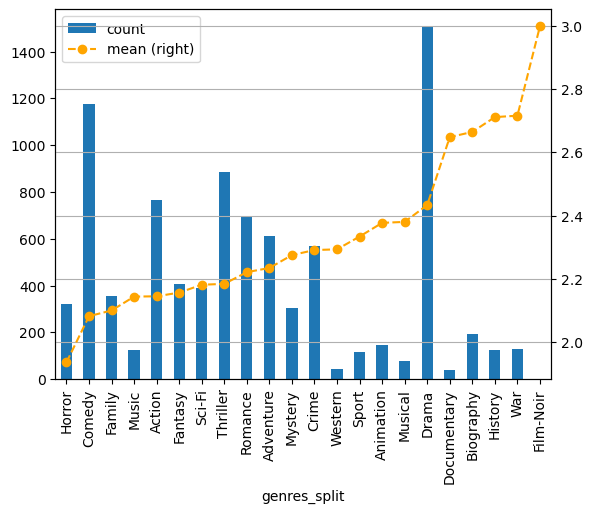

In [44]:
ax = genre_score['count'].plot(kind='bar', label='count', legend=True, use_index=False)
genre_score['mean'].plot(
    kind='line', label='mean', ax=ax, secondary_y=True, legend=True, rot=90,
    color='orange', marker='o', linestyle='--', grid=True
)

##### 1.3 One-hot encoding on genres

In [45]:
pd.get_dummies(train_dataset['content_rating'])

,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2999,False,False,False,False,False,False,False,True,False,False,False,False
3000,False,False,False,False,False,False,False,False,False,True,False,False
3001,False,False,False,False,False,False,False,False,False,True,False,False
3002,False,False,False,False,False,False,True,False,False,False,False,False


In [46]:
pd.get_dummies(tmp2['genres_split'].explode())

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3002,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3003,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
pd.get_dummies(tmp2['genres_split'].explode()).reset_index().groupby('index').sum().reset_index(drop=True)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,1,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3000,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3001,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3002,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
pd.get_dummies(tmp2['genres_split'].explode()).reset_index().groupby('index').sum().reset_index(drop=True).iloc[0]

Action         0
Adventure      1
Animation      1
Biography      0
Comedy         0
Crime          0
Documentary    0
Drama          1
Family         1
Fantasy        0
Film-Noir      0
History        0
Horror         0
Music          0
Musical        1
Mystery        0
Romance        0
Sci-Fi         0
Sport          0
Thriller       0
War            0
Western        0
Name: 0, dtype: int64

##### 1.4 One-hot using sklearn

In [49]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(train_dataset[['content_rating', 'country']])
onehot_mat = encoder.transform(train_dataset[['content_rating', 'country']])

onehot_mat.todense()

matrix([[0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
pd.DataFrame(onehot_mat.todense())

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 1.5 Clean

In [51]:
clean = train_dataset.drop(columns=[
    'id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title',
    'title_embedding', 'genres', 'country', 'content_rating', 'plot_keywords'
])

clean['language'] = (clean['language'] == 'English').astype('int')

clean.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
0,186,73,28,847,2000,422783777,644348,6458,0,656,1,1994,886,17000,0.001576,4
1,252,97,0,233,654,20433940,78883,1876,8,662,1,2005,529,0,0.000675,2
2,232,117,234,221,12000,371897,36494,13607,2,118,1,2013,1000,11000,0.003002,2
3,297,109,0,145,957,13782838,258078,1757,0,911,1,1982,163,23000,0.001726,4
4,297,171,0,857,16000,313837577,1238746,22342,2,5060,1,2001,5000,21000,0.001876,4


##### 1.6 Hold-out

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(
    clean.drop(columns=['imdb_score_binned']), clean['imdb_score_binned'], test_size=0.25, random_state=42
)

X_train.shape, X_dev.shape, y_train.shape, y_dev.shape

((2253, 15), (751, 15), (2253,), (751,))

##### 1.7 Normalization

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_dev_scaled = scaler.transform(X_dev)

#### 2. Model fitting

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

##### 2.1 Decision tree

In [55]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_dev, y_dev)

(1.0, 0.59254327563249)

##### 2.2 Ramdom forest

In [56]:
rf = RandomForestClassifier().fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_dev, y_dev)

(1.0, 0.7163781624500666)

In [57]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

num_voted_users              0.140442
num_user_for_reviews         0.094073
duration                     0.080716
title_year                   0.078517
gross                        0.077359
num_critic_for_reviews       0.074119
director_facebook_likes      0.066736
actor_3_facebook_likes       0.064364
movie_facebook_likes         0.062710
cast_total_facebook_likes    0.058870
actor_2_facebook_likes       0.057125
average_degree_centrality    0.054388
actor_1_facebook_likes       0.053436
facenumber_in_poster         0.025586
language                     0.011560
dtype: float64

<Axes: >

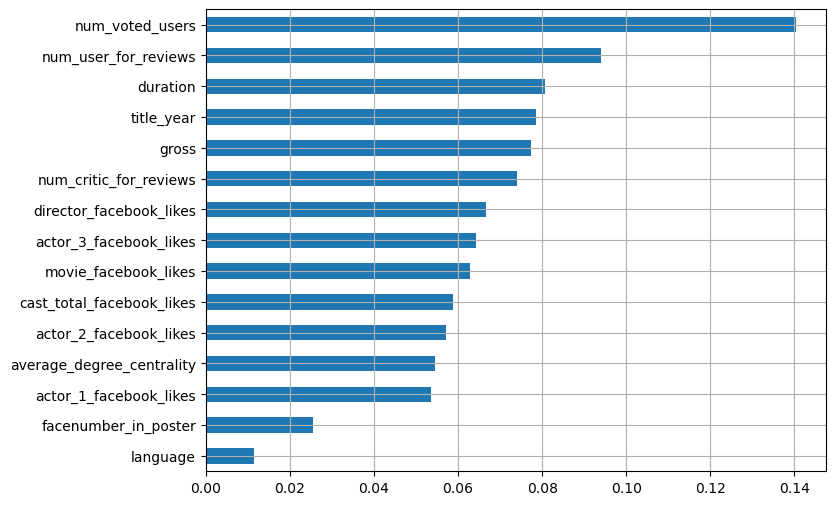

In [58]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values().plot.barh(
    grid=True, figsize=(8,6)
)

##### 2.3 Logistic regression

In [59]:
lr = LogisticRegression(
    max_iter=1000
).fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_dev_scaled, y_dev)

(0.7052818464269862, 0.7017310252996005)

In [60]:
title_train = title_embedding.iloc[X_train.index]
title_dev = title_embedding.iloc[X_dev.index]
title_train.shape, title_dev.shape

((2253, 100), (751, 100))

In [61]:
lr_title = LogisticRegression(
    max_iter=1000
).fit(title_train, y_train)
lr_title.score(title_train, y_train), lr_title.score(title_dev, y_dev)

(0.6120727918331114, 0.6125166444740346)

In [62]:
pd.Series(lr_title.predict(title_train), index=X_train.index)

1779    2
1001    2
1739    2
179     2
2320    2
       ..
1638    2
1095    2
1130    2
1294    2
860     2
Length: 2253, dtype: int64

In [63]:
stack = StackingClassifier([('lr', lr), ('lr_title', lr_title)], final_estimator=LogisticRegression())
stack.fit(X_train_scaled, y_train)
stack.score(X_train_scaled, y_train), stack.score(X_dev_scaled, y_dev)

(0.7079449622725256, 0.7003994673768309)

In [64]:
lr_title.predict(title_train).shape

(2253,)

In [65]:
X_train_scaled.shape

(2253, 15)

In [66]:
X_train_scaled_title = np.column_stack([X_train_scaled, lr_title.predict(title_train)])
X_train_scaled_title

array([[-1.10000386, -0.76989819, -0.24406499, ..., -0.4613248 ,
        -0.40276687,  2.        ],
       [ 1.15227061,  0.29959275, -0.26300911, ...,  1.33249427,
         1.91483333,  2.        ],
       [ 0.24463761, -0.72533607, -0.22512088, ..., -0.4613248 ,
        -0.71595663,  2.        ],
       ...,
       [-0.57055128, -0.01234211, -0.15130415, ..., -0.43082988,
        -0.84123187,  2.        ],
       [ 0.09336545,  0.52240337, -0.26300911, ...,  0.69938166,
         1.28845465,  2.        ],
       [ 0.30346568,  0.78977611, -0.13399315, ..., -0.4613248 ,
        -0.46540533,  2.        ]])

In [67]:
X_dev_scaled_title = np.column_stack([X_dev_scaled, lr_title.predict(title_dev)])
X_dev_scaled_title

array([[-1.1336199 , -1.03727093, -0.24112539, ..., -0.4613248 ,
        -1.21705925,  2.        ],
       [-0.70501543, -0.41340121, -0.25876302, ..., -0.44016829,
        -0.65331818,  2.        ],
       [-1.04957981, -0.68077395, -0.25974288, ..., -0.43336233,
        -0.77859425,  2.        ],
       ...,
       [-0.73863147, -0.36883909, -0.06834199, ..., -0.35580604,
        -0.65331818,  2.        ],
       [-0.46970317, -0.01234211, -0.22806048, ..., -0.4613248 ,
        -0.90387032,  2.        ],
       [-0.62937935,  0.65608974, -0.24798447, ..., -0.4613248 ,
        -1.02914556,  2.        ]])

In [68]:
lr_with_title = LogisticRegression(
    max_iter=1000
).fit(X_train_scaled_title, y_train)
lr_with_title.score(X_train_scaled_title, y_train), lr_with_title.score(X_dev_scaled_title, y_dev)

(0.7052818464269862, 0.7017310252996005)

##### 2.4 MLP

In [69]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 16), early_stopping=True, max_iter=100, random_state=42,
    learning_rate='adaptive', learning_rate_init=0.01
).fit(X_train_scaled, y_train)
mlp.score(X_train_scaled, y_train), mlp.score(X_dev_scaled, y_dev)

(0.7390146471371505, 0.7283621837549934)

In [70]:
mlp.loss_curve_

[1.3907663020361478,
 0.9513019458964034,
 0.8267063791800436,
 0.7703050274761776,
 0.7413494340797813,
 0.7127456553299136,
 0.7054401908214107,
 0.694737096812688,
 0.6825047114170754,
 0.6686191551396525,
 0.6711529806784227,
 0.6641598451459816,
 0.6812243970057763,
 0.6570686587367334,
 0.6467617669615033,
 0.6328063446377494,
 0.6265132107062387,
 0.6280041319658053,
 0.61786011075058,
 0.6011027594220928,
 0.602649912245796,
 0.6063400482097613]

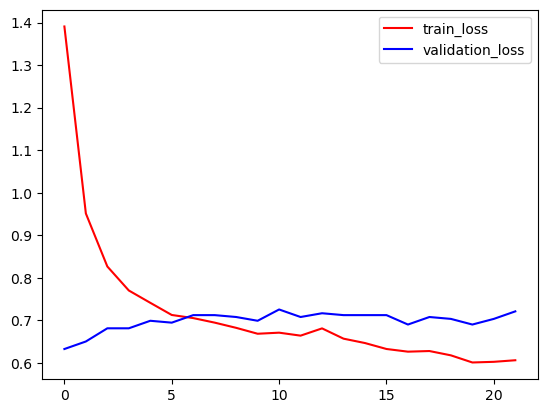

In [71]:
plt.plot(mlp.loss_curve_, color='r', label='train_loss')
plt.plot(mlp.validation_scores_, color='b', label='validation_loss')
plt.legend()

#### 3. Evaluation

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(y_dev, mlp.predict(X_dev_scaled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      0.02      0.03        57
           2       0.74      0.91      0.82       460
           3       0.69      0.55      0.61       201
           4       0.77      0.63      0.69        27

    accuracy                           0.73       751
   macro avg       0.51      0.42      0.43       751
weighted avg       0.69      0.73      0.69       751



c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
confusion_matrix(y_dev, mlp.predict(X_dev_scaled))

array([[  0,   0,   6,   0,   0],
       [  0,   1,  55,   1,   0],
       [  0,   2, 418,  40,   0],
       [  0,   0,  85, 111,   5],
       [  0,   0,   1,   9,  17]], dtype=int64)

In [75]:
y_dev.value_counts()

imdb_score_binned
2    460
3    201
1     57
4     27
0      6
Name: count, dtype: int64

In [76]:
print(classification_report(y_dev, lr_title.predict(title_dev)))

c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        57
           2       0.61      1.00      0.76       460
           3       0.00      0.00      0.00       201
           4       0.00      0.00      0.00        27

    accuracy                           0.61       751
   macro avg       0.12      0.20      0.15       751
weighted avg       0.38      0.61      0.47       751



c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
confusion_matrix(y_dev, lr_title.predict(title_dev))

array([[  0,   0,   6,   0,   0],
       [  0,   0,  57,   0,   0],
       [  0,   0, 460,   0,   0],
       [  0,   0, 201,   0,   0],
       [  0,   0,  27,   0,   0]], dtype=int64)

In [78]:
print(classification_report(y_dev, lr.predict(X_dev_scaled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        57
           2       0.71      0.91      0.80       460
           3       0.65      0.44      0.53       201
           4       0.78      0.67      0.72        27

    accuracy                           0.70       751
   macro avg       0.43      0.40      0.41       751
weighted avg       0.64      0.70      0.66       751



c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
confusion_matrix(y_dev, lr.predict(X_dev_scaled))

array([[  0,   0,   6,   0,   0],
       [  0,   0,  57,   0,   0],
       [  0,   1, 420,  39,   0],
       [  0,   0, 107,  89,   5],
       [  0,   0,   1,   8,  18]], dtype=int64)

In [80]:
# uneven class distribution

#### 4. Parameter tuning

##### 4.1 Tune one parameter

In [81]:
from sklearn.model_selection import validation_curve

In [82]:
param_range = np.logspace(-1, 2, 10) # 10 points from 1e-4 to 1e2

train_scores, validation_scores = validation_curve(
    LogisticRegression(max_iter=1000), X_train_scaled, y_train, 
    param_name='C', param_range=param_range, cv=5, n_jobs=-1, verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.1s finished


In [83]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

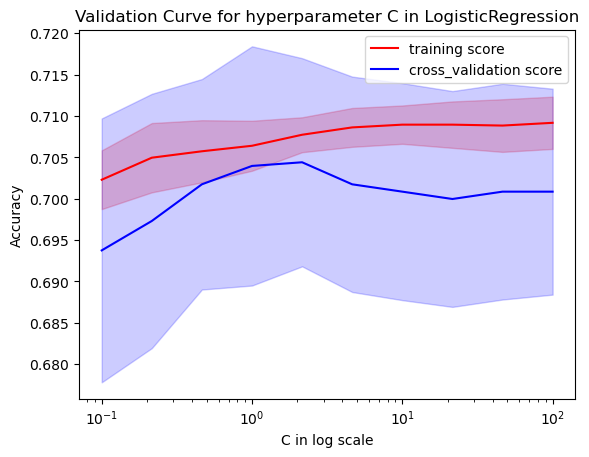

In [84]:
plt.semilogx(param_range, mean_train_scores, label='training score', color='r')
plt.fill_between(param_range, mean_train_scores-std_train_scores, 
                 mean_train_scores+std_train_scores, color='r', 
                 alpha=0.2)

plt.semilogx(param_range, mean_valid_scores, label='cross_validation score', color='b')
plt.fill_between(param_range, mean_valid_scores-std_valid_scores, 
                 mean_valid_scores+std_valid_scores, color='b', 
                 alpha=0.2)

plt.legend(loc='best')

plt.title('Validation Curve for hyperparameter C in LogisticRegression')
plt.xlabel('C in log scale')
plt.ylabel('Accuracy')
plt.show()

In [85]:
mean_valid_scores

array([0.69374723, 0.69730081, 0.7017354 , 0.70395467, 0.70439714,
       0.70173245, 0.70084651, 0.69995861, 0.70084651, 0.70084553])

In [86]:
param_range

array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ])

In [87]:
# refit using best hyperparameter
lr = LogisticRegression(C=2, max_iter=1000).fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_dev_scaled, y_dev)

(0.7061695517088327, 0.7017310252996005)

In [88]:
param_range = np.logspace(-4, 10, 10) # 10 points from 1e-4 to 1e2

train_scores, validation_scores = validation_curve(
    LinearSVC(), X_train_scaled, y_train, 
    param_name='C', param_range=param_range, cv=5, n_jobs=-1, verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.8s finished


In [89]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

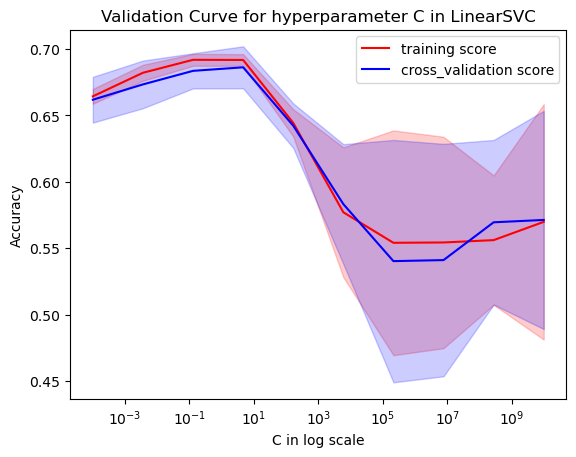

In [90]:
plt.semilogx(param_range, mean_train_scores, label='training score', color='r')
plt.fill_between(param_range, mean_train_scores-std_train_scores, 
                 mean_train_scores+std_train_scores, color='r', 
                 alpha=0.2)

plt.semilogx(param_range, mean_valid_scores, label='cross_validation score', color='b')
plt.fill_between(param_range, mean_valid_scores-std_valid_scores, 
                 mean_valid_scores+std_valid_scores, color='b', 
                 alpha=0.2)

plt.legend(loc='best')

plt.title('Validation Curve for hyperparameter C in LinearSVC')
plt.xlabel('C in log scale')
plt.ylabel('Accuracy')
plt.show()

##### 4.2 Grid-search

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [92]:
pipeline = Pipeline(
    [
        ('clf', RandomForestClassifier(random_state=42))
    ]
)

In [93]:
parameters = {
    'clf__max_depth': (5, 10, None), # Every tree's depth
    'clf__n_estimators': (100, 200, 500, 1000), # Number of trees
    # 'clf__max_features': ('sqrt', 'log', None) # Number of features
}

In [94]:
gs = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2, cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [95]:
mean_score = gs.cv_results_['mean_test_score']
param_set = gs.cv_results_['params']

In [96]:
mean_score

array([0.68974427, 0.68797142, 0.68752796, 0.68797044, 0.70749544,
       0.70749446, 0.70838137, 0.70749938, 0.71414831, 0.71592412,
       0.71992412, 0.71592905])

In [100]:
param_set

[{'clf__max_depth': 5, 'clf__n_estimators': 100},
 {'clf__max_depth': 5, 'clf__n_estimators': 200},
 {'clf__max_depth': 5, 'clf__n_estimators': 500},
 {'clf__max_depth': 5, 'clf__n_estimators': 1000},
 {'clf__max_depth': 10, 'clf__n_estimators': 100},
 {'clf__max_depth': 10, 'clf__n_estimators': 200},
 {'clf__max_depth': 10, 'clf__n_estimators': 500},
 {'clf__max_depth': 10, 'clf__n_estimators': 1000},
 {'clf__max_depth': None, 'clf__n_estimators': 100},
 {'clf__max_depth': None, 'clf__n_estimators': 200},
 {'clf__max_depth': None, 'clf__n_estimators': 500},
 {'clf__max_depth': None, 'clf__n_estimators': 1000}]

In [99]:
pd.Series(mean_score).sort_values()

2     0.687528
3     0.687970
1     0.687971
0     0.689744
5     0.707494
4     0.707495
7     0.707499
6     0.708381
8     0.714148
9     0.715924
11    0.715929
10    0.719924
dtype: float64

In [101]:
param_set[10]

{'clf__max_depth': None, 'clf__n_estimators': 500}

In [104]:
param_set[mean_score.argsort()[-1]]

{'clf__max_depth': None, 'clf__n_estimators': 500}

In [105]:
parameters = {
    'clf__max_depth': (5, 10, None), # Every tree's depth
    'clf__n_estimators': (100, 200, 500, 1000), # Number of trees
    'clf__max_features': ('sqrt', 'log', None) # Number of features
}

In [106]:
gs = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\cxlan\Anaconda3\

In [107]:
mean_score = gs.cv_results_['mean_test_score']
param_set = gs.cv_results_['params']

In [108]:
mean_score

array([0.68797159, 0.68530848, 0.68575233, 0.68486462,        nan,
              nan,        nan,        nan, 0.69063471, 0.69063471,
       0.69196627, 0.69107856, 0.70128717, 0.70261873, 0.69995561,
       0.70261873,        nan,        nan,        nan,        nan,
       0.70616955, 0.71016423, 0.70838881, 0.71193964, 0.70439414,
       0.70306258, 0.70616955, 0.70705726,        nan,        nan,
              nan,        nan, 0.70838881, 0.70883267, 0.71149578,
       0.71460275])

In [109]:
param_set

[{'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100},
 {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200},
 {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 500},
 {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 1000},
 {'clf__max_depth': 5, 'clf__max_features': 'log', 'clf__n_estimators': 100},
 {'clf__max_depth': 5, 'clf__max_features': 'log', 'clf__n_estimators': 200},
 {'clf__max_depth': 5, 'clf__max_features': 'log', 'clf__n_estimators': 500},
 {'clf__max_depth': 5, 'clf__max_features': 'log', 'clf__n_estimators': 1000},
 {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 100},
 {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 200},
 {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 500},
 {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 1000},
 {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__n_

In [117]:
pd.Series(mean_score).fillna(0).sort_values(ascending=False)

35    0.714603
23    0.711940
34    0.711496
21    0.710164
33    0.708833
32    0.708389
22    0.708389
27    0.707057
26    0.706170
20    0.706170
24    0.704394
25    0.703063
15    0.702619
13    0.702619
12    0.701287
14    0.699956
10    0.691966
11    0.691079
8     0.690635
9     0.690635
0     0.687972
2     0.685752
1     0.685308
3     0.684865
19    0.000000
17    0.000000
16    0.000000
7     0.000000
6     0.000000
5     0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
4     0.000000
18    0.000000
dtype: float64

In [120]:
param_set[35]

{'clf__max_depth': None, 'clf__max_features': None, 'clf__n_estimators': 1000}

##### 4.3 Learning curve

In [121]:
from sklearn.model_selection import learning_curve

In [122]:
train_size, train_scores, validation_scores = learning_curve(
    LogisticRegression(C=2, max_iter=1000), X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1, 5), cv=5, n_jobs=-1, verbose=1
)

[learning_curve] Training set sizes: [ 180  585  991 1396 1802]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.5s finished


In [123]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

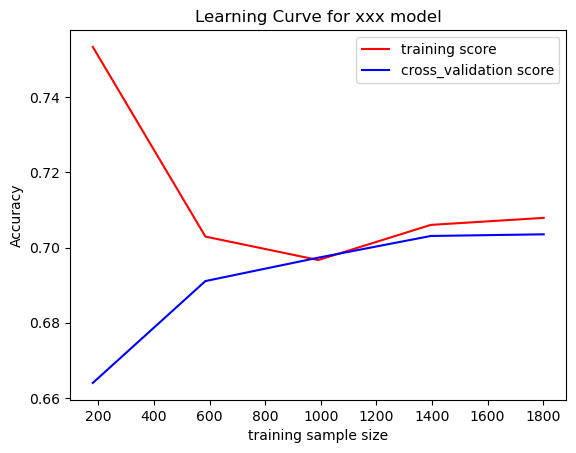

In [125]:
plt.plot(train_size, mean_train_scores, label='training score', color='r')
# plt.fill_between(train_size, mean_train_scores-std_train_scores, 
#                  mean_train_scores+std_train_scores, color='r', 
#                  alpha=0.2)

plt.plot(train_size, mean_valid_scores, label='cross_validation score', color='b')
# plt.fill_between(train_size, mean_valid_scores-std_valid_scores, 
#                  mean_valid_scores+std_valid_scores, color='b', 
#                  alpha=0.2)

plt.legend(loc='best')

plt.title('Learning Curve for xxx model')
plt.xlabel('training sample size')
plt.ylabel('Accuracy')
plt.show()

In [127]:
train_size, train_scores, validation_scores = learning_curve(
    RandomForestClassifier(n_estimators=1000), 
    clean.drop(columns=['imdb_score_binned']), clean['imdb_score_binned'],
    train_sizes=np.linspace(0.1, 1, 10), cv=5, n_jobs=-1, verbose=1
)

[learning_curve] Training set sizes: [ 240  480  720  961 1201 1441 1682 1922 2162 2403]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.0min finished


In [128]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

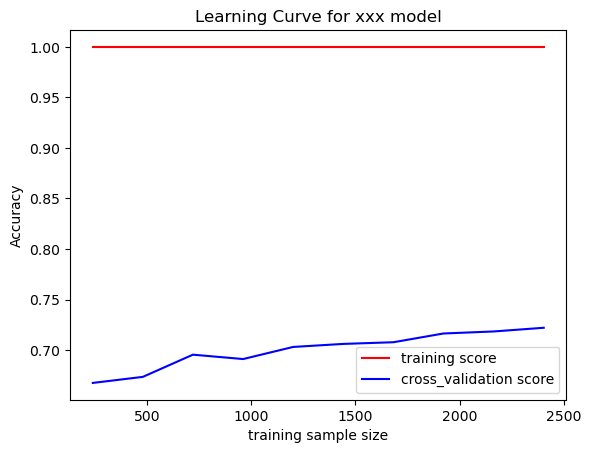

In [129]:
plt.plot(train_size, mean_train_scores, label='training score', color='r')
# plt.fill_between(train_size, mean_train_scores-std_train_scores, 
#                  mean_train_scores+std_train_scores, color='r', 
#                  alpha=0.2)

plt.plot(train_size, mean_valid_scores, label='cross_validation score', color='b')
# plt.fill_between(train_size, mean_valid_scores-std_valid_scores, 
#                  mean_valid_scores+std_valid_scores, color='b', 
#                  alpha=0.2)

plt.legend(loc='best')

plt.title('Learning Curve for xxx model')
plt.xlabel('training sample size')
plt.ylabel('Accuracy')
plt.show()